# <a name='Clusters_Analysis_and_Customers_Profiling'></a>

<div style="border-radius:10px;
            background-color:blue;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:white; font-weight: bold; font-family: Cursive">
1. Import</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [120]:
from matplotlib import rcParams

# Thay đổi font chữ thành Times New Roman
rcParams['font.family'] = 'Times New Roman'

# Xử lý dữ liệu dạng bảng và ma trận
import pandas as pd
import numpy as np

# Trực quan hóa
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Bỏ qua các cảnh báo
import warnings
warnings.filterwarnings('ignore')



# <a name='Clusters_Analysis_and_Customers_Profiling'></a>

<div style="border-radius:10px;
            background-color:blue;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:white; font-weight: bold; font-family: Cursive">
2. Nhập và xử lý dữ liệu</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [4]:
#Nhập data Customer
df_PKhaoSat  = pd.read_csv("PhieuKhaoSat.csv")
df_PKhaoSat.head()

,Dấu thời gian,"Trong 6 tháng gần đây, anh/chị có sử dụng ứng dụng giao đồ ăn trực tuyến không?",1. Giới tính của anh/chị?,2. Độ tuổi của anh/chị?,3. Nghề nghiệp chính của anh/chị là?,4. Thu nhập hàng tháng của anh/chị?,5. Mức độ bận rộn công việc của anh/chị?,6. Ứng dụng giao đồ ăn trực tuyến anh/chị thường xuyên sử dụng nhất là?,7. Tần suất anh/chị sử dụng ứng dụng giao đồ ăn trực tuyến?,8. Thời gian sử dụng ứng dụng giao đồ ăn trực tuyến của anh/chị là?,...,Ý định tiếp tục sử dụng ứng dụng giao đồ ăn trực tuyến [Tôi chọn sử dụng một ứng dụng thay vì sử dụng một ứng dụng khác tương đồng.],Ý định tiếp tục sử dụng ứng dụng giao đồ ăn trực tuyến [Tôi sẽ mời những người khác sử dụng ứng dụng.],Ý định tiếp tục sử dụng ứng dụng giao đồ ăn trực tuyến [Tôi dự định sẽ luôn sử dụng ứng dụng trong cuộc sống hàng ngày của mình.],Anh/chị nhận được phiếu khảo sát từ ai?,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,4/12/2024 5:58:21,Có,Nam,Từ 18 đến 25 tuổi,Sinh viên,Từ 3 đến 5 triệu đồng,Ít bận rộn,beFood (be),Ít hơn 1 lần/tháng,Dưới 1 năm,...,3.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4/13/2024 9:51:43,Có,Nam,Từ 18 đến 25 tuổi,Sinh viên,Dưới 3 triệu đồng,Bình thường,GoFood (Gojek),Từ 3 đến 4 lần/tháng,Từ 1 đến 2 năm,...,5.0,2.0,5.0,Quang Nhật,NaN,Có,0.0,NaN,NaN,NaN
2,4/13/2024 12:32:17,Có,Nữ,Từ 18 đến 25 tuổi,Sinh viên,Dưới 3 triệu đồng,Rất ít bận rộn,GoFood (Gojek),Từ 1 đến 2 lần/tháng,Dưới 1 năm,...,4.0,3.0,3.0,Quang Nhật,NaN,Không,0.0,NaN,NaN,NaN
3,4/13/2024 12:46:24,Có,Nữ,Từ 18 đến 25 tuổi,Sinh viên,Dưới 3 triệu đồng,Bận rộn,GoFood (Gojek),Ít hơn 1 lần/tháng,Từ 1 đến 2 năm,...,2.0,3.0,3.0,Quang Nhật,NaN,NaN,0.0,NaN,NaN,NaN
4,4/13/2024 12:48:15,Có,Nữ,Từ 18 đến 25 tuổi,Sinh viên,Dưới 3 triệu đồng,Bận rộn,ShopeeFood (Shopee),Từ 1 đến 2 lần/tháng,Dưới 1 năm,...,3.0,4.0,4.0,Quang Nhật,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_PKhaoSat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 45 columns):
 #   Column                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                              --------------  -----  
 0   Dấu thời gian                                                                                                                                       368 non-null    object 
 1   Trong 6 tháng gần đây, anh/chị có sử dụng ứng dụng giao đồ ăn trực tuyến không?                                                                     368 non-null    object 
 2   1. Giới tính của anh/chị?                                                                                                                           318 non-null    object 
 3   2. Độ

In [11]:
#check giá trị thiếu trong dataframe
khaosat_info = {
    "shape": df_PKhaoSat.shape,  # Kích thước dữ liệu (số dòng, số cột)
    "null_summary": df_PKhaoSat.isnull().sum(),  # Số lượng giá trị null trong mỗi cột
    "preview": df_PKhaoSat.head()  # Xem trước 5 dòng đầu
}
khaosat_info

{'shape': (368, 45),
 'null_summary': Dấu thời gian                                                                                                                                           0
 Trong 6 tháng gần đây, anh/chị có sử dụng ứng dụng giao đồ ăn trực tuyến không?                                                                         0
 1. Giới tính của anh/chị?                                                                                                                              50
 2. Độ tuổi của anh/chị?                                                                                                                                50
 3. Nghề nghiệp chính của anh/chị là?                                                                                                                   50
 4. Thu nhập hàng tháng của anh/chị?                                                                                                                    50
 5. Mức độ bận rộn công việc của 

In [22]:
# 1. Loại bỏ các cột không cần thiết (Unnamed và toàn Null)
columns_to_drop = [col for col in df_PKhaoSat.columns if col.startswith("Unnamed") or df_PKhaoSat[col].isnull().all()]
df_khaosat_cleaned = df_PKhaoSat.drop(columns=columns_to_drop)

# 2. Điền giá trị Null
for col in df_khaosat_cleaned.columns:
    # Nếu cột là dạng số -> Thay bằng giá trị trung bình
    if df_khaosat_cleaned[col].dtype in ['float64', 'int64']:
        df_khaosat_cleaned[col] = df_khaosat_cleaned[col].fillna(df_khaosat_cleaned[col].median())  
    # Nếu cột là dạng object (chuỗi/phân loại) -> Thay bằng giá trị xuất hiện phổ biến nhất
    elif data_cleaned[col].dtype == 'object':
        df_khaosat_cleaned[col] = df_khaosat_cleaned[col].fillna(df_khaosat_cleaned[col].mode()[0])  

# 3. Kiểm tra lại số lượng Null còn lại
df_khaosat_cleaned.isnull().sum()

Dấu thời gian                                                                                                                                         0
Trong 6 tháng gần đây, anh/chị có sử dụng ứng dụng giao đồ ăn trực tuyến không?                                                                       0
1. Giới tính của anh/chị?                                                                                                                             0
2. Độ tuổi của anh/chị?                                                                                                                               0
3. Nghề nghiệp chính của anh/chị là?                                                                                                                  0
4. Thu nhập hàng tháng của anh/chị?                                                                                                                   0
5. Mức độ bận rộn công việc của anh/chị?                                                

In [23]:
df_khaosat_cleaned.head()

,Dấu thời gian,"Trong 6 tháng gần đây, anh/chị có sử dụng ứng dụng giao đồ ăn trực tuyến không?",1. Giới tính của anh/chị?,2. Độ tuổi của anh/chị?,3. Nghề nghiệp chính của anh/chị là?,4. Thu nhập hàng tháng của anh/chị?,5. Mức độ bận rộn công việc của anh/chị?,6. Ứng dụng giao đồ ăn trực tuyến anh/chị thường xuyên sử dụng nhất là?,7. Tần suất anh/chị sử dụng ứng dụng giao đồ ăn trực tuyến?,8. Thời gian sử dụng ứng dụng giao đồ ăn trực tuyến của anh/chị là?,...,Sự kích thích khi sử dụng ứng dụng giao hàng trực tuyến [Tôi rất nhiệt tình khi sử dụng ứng dụng.],Quyền kiểm soát khi sử dụng ứng dụng giao hàng trực tuyến [Tôi cảm thấy tự chủ khi sử dụng ứng dụng.],Quyền kiểm soát khi sử dụng ứng dụng giao hàng trực tuyến [Tôi có quyền kiểm soát ứng dụng.],Quyền kiểm soát khi sử dụng ứng dụng giao hàng trực tuyến [Tôi có thể tự do lựa chọn sản phẩm trên ứng dụng.],Quyền kiểm soát khi sử dụng ứng dụng giao hàng trực tuyến [Tôi có thể lựa chọn sản phẩm dựa trên kinh nghiệm của bản thân],Ý định tiếp tục sử dụng ứng dụng giao đồ ăn trực tuyến [Tôi có ý định sử dụng lại ứng dụng.],Ý định tiếp tục sử dụng ứng dụng giao đồ ăn trực tuyến [Tôi chọn sử dụng một ứng dụng thay vì sử dụng một ứng dụng khác tương đồng.],Ý định tiếp tục sử dụng ứng dụng giao đồ ăn trực tuyến [Tôi sẽ mời những người khác sử dụng ứng dụng.],Ý định tiếp tục sử dụng ứng dụng giao đồ ăn trực tuyến [Tôi dự định sẽ luôn sử dụng ứng dụng trong cuộc sống hàng ngày của mình.],Anh/chị nhận được phiếu khảo sát từ ai?
0,4/12/2024 5:58:21,Có,Nam,Từ 18 đến 25 tuổi,Sinh viên,Từ 3 đến 5 triệu đồng,Ít bận rộn,beFood (be),Ít hơn 1 lần/tháng,Dưới 1 năm,...,1.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,Thu Hương
1,4/13/2024 9:51:43,Có,Nam,Từ 18 đến 25 tuổi,Sinh viên,Dưới 3 triệu đồng,Bình thường,GoFood (Gojek),Từ 3 đến 4 lần/tháng,Từ 1 đến 2 năm,...,5.0,4.0,5.0,4.0,3.0,5.0,5.0,2.0,5.0,Quang Nhật
2,4/13/2024 12:32:17,Có,Nữ,Từ 18 đến 25 tuổi,Sinh viên,Dưới 3 triệu đồng,Rất ít bận rộn,GoFood (Gojek),Từ 1 đến 2 lần/tháng,Dưới 1 năm,...,4.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,Quang Nhật
3,4/13/2024 12:46:24,Có,Nữ,Từ 18 đến 25 tuổi,Sinh viên,Dưới 3 triệu đồng,Bận rộn,GoFood (Gojek),Ít hơn 1 lần/tháng,Từ 1 đến 2 năm,...,2.0,4.0,4.0,5.0,5.0,4.0,2.0,3.0,3.0,Quang Nhật
4,4/13/2024 12:48:15,Có,Nữ,Từ 18 đến 25 tuổi,Sinh viên,Dưới 3 triệu đồng,Bận rộn,ShopeeFood (Shopee),Từ 1 đến 2 lần/tháng,Dưới 1 năm,...,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,Quang Nhật


In [36]:
#tóm tắt
df_khaosat_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Độ tin cậy của ứng dụng giao đồ ăn trực tuyến [Tôi tin vào độ tin cậy của ứng dụng khi đặt hàng],368.0,3.951087,0.840267,1.0,4.00,4.0,4.0,5.0
Độ tin cậy của ứng dụng giao đồ ăn trực tuyến [Tôi cảm thấy an toàn khi đặt đồ ăn thông qua ứng dụng.],368.0,3.866848,0.867951,1.0,3.00,4.0,4.0,5.0
Độ tin cậy của ứng dụng giao đồ ăn trực tuyến [Thông tin được cung cấp bởi ứng dụng là đáng tin cậy],368.0,3.842391,0.826764,1.0,3.00,4.0,4.0,5.0
Độ tin cậy của ứng dụng giao đồ ăn trực tuyến [Ứng dụng hiển thị kết quả đúng với những thao tác của tôi],368.0,4.008152,0.820340,1.0,4.00,4.0,5.0,5.0
Sự thuận tiện của ứng dụng giao đồ ăn trực tuyến [Tôi cảm thấy thuận tiện khi sử dụng ứng dụng],368.0,4.105978,0.833343,1.0,4.00,4.0,5.0,5.0
Sự thuận tiện của ứng dụng giao đồ ăn trực tuyến [Ứng dụng cho phép tôi gọi đồ ăn bất cứ lúc nào.],368.0,4.097826,0.855306,1.0,4.00,4.0,5.0,5.0
Sự thuận tiện của ứng dụng giao đồ ăn trực tuyến [Ứng dụng cho phép tôi gọi đồ ăn ở bất kì nơi đâu.],368.0,3.994565,0.913103,1.0,4.00,4.0,5.0,5.0
Sự thuận tiện của ứng dụng giao đồ ăn trực tuyến [Tôi cảm thấy thuận tiện khi so sánh giá đồ ăn từ những địa điểm ăn uống khác nhau trên ứng dụng],368.0,4.002717,0.868770,1.0,4.00,4.0,5.0,5.0
Thông tin về giá cả trên ứng dụng giao hàng trực tuyến [Ứng dụng hiển thị thông tin giá từng sản phẩm.],368.0,4.198370,0.802786,1.0,4.00,4.0,5.0,5.0
Thông tin về giá cả trên ứng dụng giao hàng trực tuyến [Ứng dụng hiển thị tổng giá mà người dùng phải trả.],368.0,4.233696,0.818556,1.0,4.00,4.0,5.0,5.0


In [35]:
#Tóm tắt dữ liệu kiểu object
df_khaosat_cleaned.describe(include=object).T

,count,unique,top,freq
Dấu thời gian,368,366,4/13/2024 20:38:39,2
"Trong 6 tháng gần đây, anh/chị có sử dụng ứng dụng giao đồ ăn trực tuyến không?",368,2,Có,318
1. Giới tính của anh/chị?,368,2,Nữ,236
2. Độ tuổi của anh/chị?,368,5,Từ 18 đến 25 tuổi,305
3. Nghề nghiệp chính của anh/chị là?,368,7,Sinh viên,276
4. Thu nhập hàng tháng của anh/chị?,368,4,Dưới 3 triệu đồng,219
5. Mức độ bận rộn công việc của anh/chị?,368,7,Bình thường,181
6. Ứng dụng giao đồ ăn trực tuyến anh/chị thường xuyên sử dụng nhất là?,368,6,ShopeeFood (Shopee),164
7. Tần suất anh/chị sử dụng ứng dụng giao đồ ăn trực tuyến?,368,5,Ít hơn 1 lần/tháng,141
8. Thời gian sử dụng ứng dụng giao đồ ăn trực tuyến của anh/chị là?,368,4,Từ 1 đến 2 năm,173


# <a name='Clusters_Analysis_and_Customers_Profiling'></a>

<div style="border-radius:10px;
            background-color:blue;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:white; font-weight: bold; font-family: Cursive">
3. EDA - Exploratory Data Analysis</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

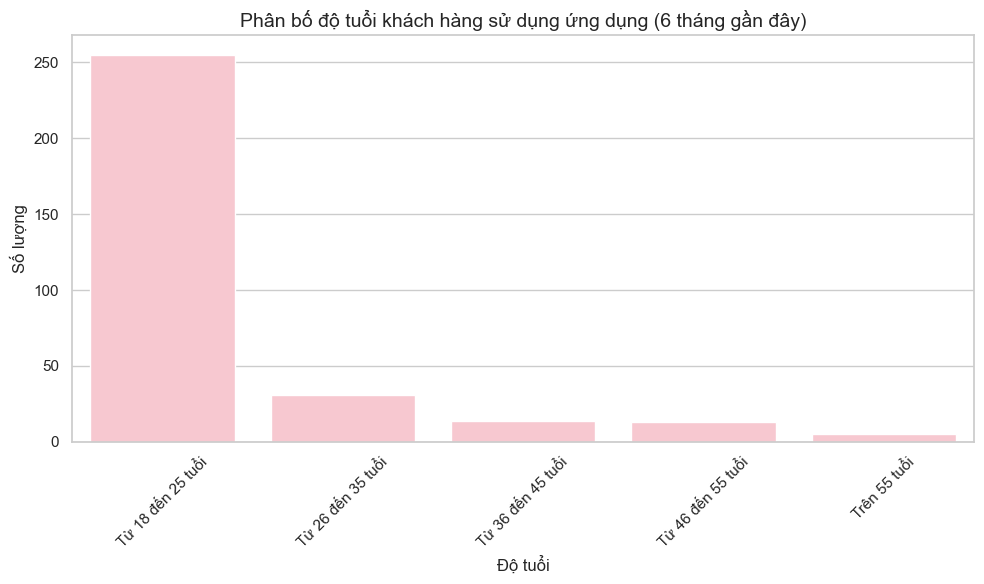

In [95]:
# Lọc dữ liệu cho những khách hàng đã sử dụng ứng dụng giao đồ ăn trong 6 tháng qua
filtered_data = df_khaosat_cleaned[df_khaosat_cleaned['Trong 6 tháng gần đây, anh/chị có sử dụng ứng dụng giao đồ ăn trực tuyến không?'] == 'Có']

# Thiết lập kiểu trực quan
sns.set_theme(style="whitegrid")

# 1. Phân bố độ tuổi khách hàng
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='2. Độ tuổi của anh/chị?', order=filtered_data['2. Độ tuổi của anh/chị?'].value_counts().index, color ="pink")
plt.title('Phân bố độ tuổi khách hàng sử dụng ứng dụng (6 tháng gần đây)', fontsize=14)
plt.xlabel('Độ tuổi', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

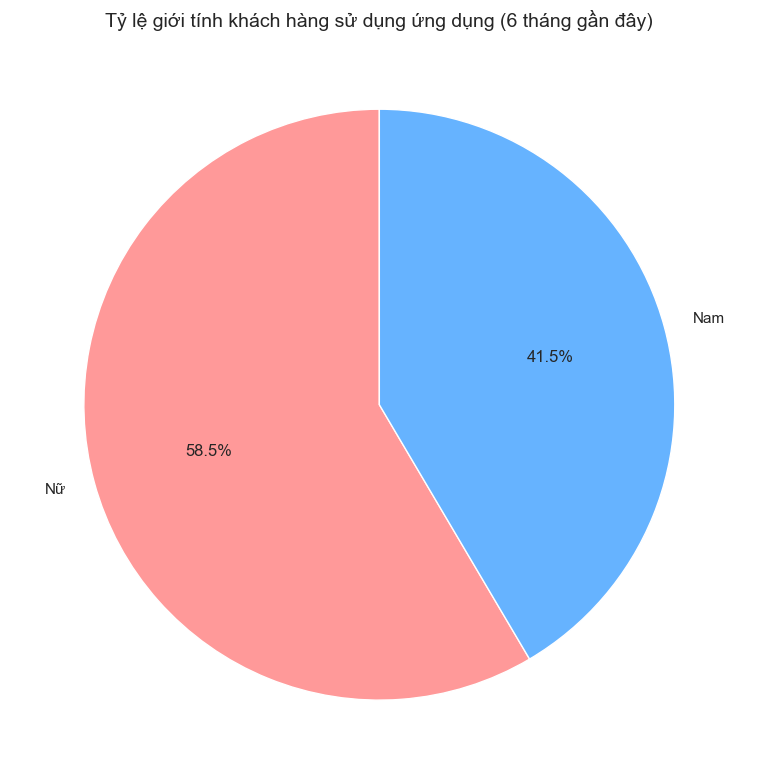

In [53]:
# 2. Tỷ lệ giới tính khách hàng
gender_counts = filtered_data['1. Giới tính của anh/chị?'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Tỷ lệ giới tính khách hàng sử dụng ứng dụng (6 tháng gần đây)', fontsize=14)
plt.tight_layout()
plt.show()

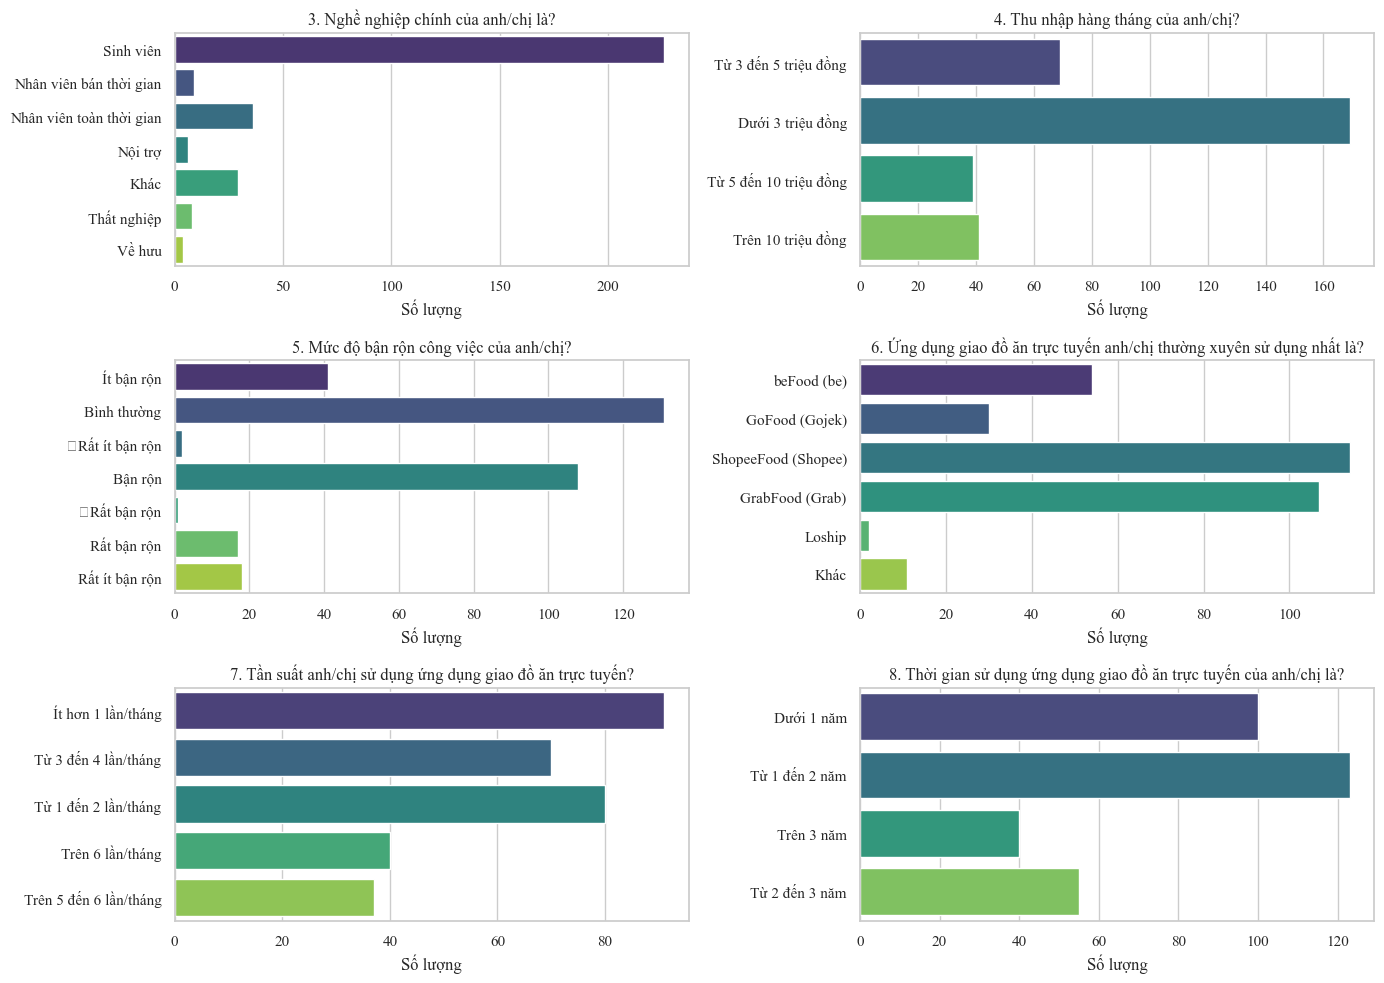

In [121]:

# Chọn các cột cần trực quan hóa
columns_of_interest = [
    "3. Nghề nghiệp chính của anh/chị là?",
    "4. Thu nhập hàng tháng của anh/chị?",
    "5. Mức độ bận rộn công việc của anh/chị?",
    "6. Ứng dụng giao đồ ăn trực tuyến anh/chị thường xuyên sử dụng nhất là?",
    "7. Tần suất anh/chị sử dụng ứng dụng giao đồ ăn trực tuyến?",
    "8. Thời gian sử dụng ứng dụng giao đồ ăn trực tuyến của anh/chị là?",
]

# Tạo các biểu đồ
plt.figure(figsize=(14, 10))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=filtered_data, y=column, palette="viridis")
    plt.title(column)
    plt.xlabel("Số lượng")
    plt.ylabel("")

plt.tight_layout()
plt.show()


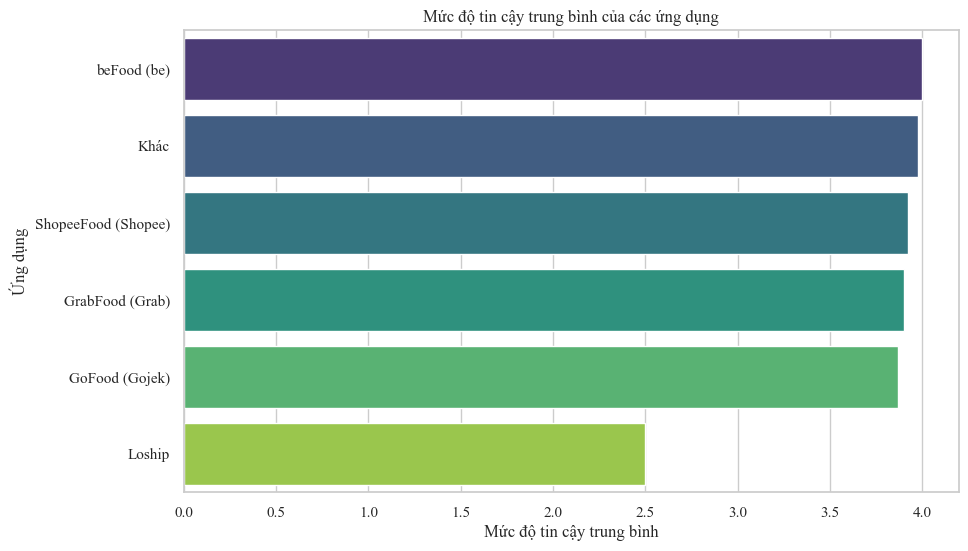

Ứng dụng có độ tin cậy cao nhất là: beFood (be) với điểm tin cậy trung bình: 3.9954


In [122]:
# Tên các cột liên quan đến độ tin cậy
reliability_columns = [
    "Độ tin cậy của ứng dụng giao đồ ăn trực tuyến [Tôi tin vào độ tin cậy của ứng dụng khi đặt hàng]",
    "Độ tin cậy của ứng dụng giao đồ ăn trực tuyến [Tôi cảm thấy an toàn khi đặt đồ ăn thông qua ứng dụng.]",
    "Độ tin cậy của ứng dụng giao đồ ăn trực tuyến [Thông tin được cung cấp bởi ứng dụng là đáng tin cậy]",
    "Độ tin cậy của ứng dụng giao đồ ăn trực tuyến [Ứng dụng hiển thị kết quả đúng với những thao tác của tôi]"
]

# Tên cột chứa thông tin ứng dụng
application_column = "6. Ứng dụng giao đồ ăn trực tuyến anh/chị thường xuyên sử dụng nhất là?"


# Kiểm tra nếu các cột cần thiết có trong dữ liệu
if all(col in df_khaosat_cleaned.columns for col in reliability_columns) and application_column in df_khaosat_cleaned.columns:
    # Tính mức độ tin cậy trung bình tạm thời
    reliability_mean = (
        df_khaosat_cleaned.groupby(application_column)[reliability_columns].mean().mean(axis=1).sort_values(ascending=False)
    )

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    sns.barplot(x=reliability_mean, y=reliability_mean.index, palette="viridis")
    plt.title("Mức độ tin cậy trung bình của các ứng dụng")
    plt.xlabel("Mức độ tin cậy trung bình")
    plt.ylabel("Ứng dụng")
    plt.show()

    # Ứng dụng có độ tin cậy cao nhất
    most_reliable_app = reliability_mean.idxmax()
    max_reliability_score = reliability_mean.max()

    
    print(f"Ứng dụng có độ tin cậy cao nhất là: {most_reliable_app} với điểm tin cậy trung bình: {max_reliability_score:.4f}")
else:
    print("Dữ liệu không chứa đủ cột cần thiết.")


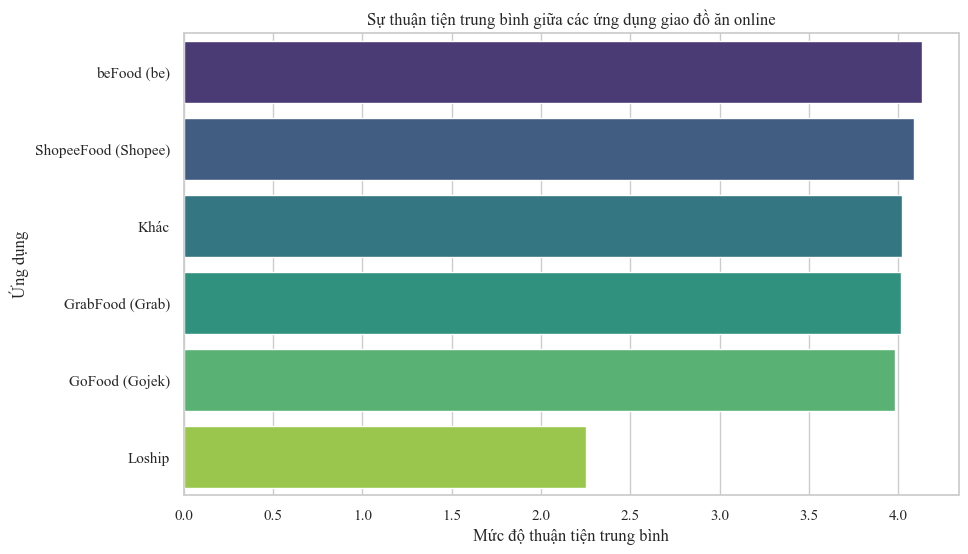

Ứng dụng có độ thuận tiện cao nhất là: beFood (be) với điểm thuận tiện trung bình: 3.9954


In [123]:
# Tên các cột liên quan đến độ tiện lợi
convenience_columns = [
    "Sự thuận tiện của ứng dụng giao đồ ăn trực tuyến [Tôi cảm thấy thuận tiện khi sử dụng ứng dụng]",
    "Sự thuận tiện của ứng dụng giao đồ ăn trực tuyến [Ứng dụng cho phép tôi gọi đồ ăn bất cứ lúc nào.]",	
    "Sự thuận tiện của ứng dụng giao đồ ăn trực tuyến [Ứng dụng cho phép tôi gọi đồ ăn ở bất kì nơi đâu.]",	
    "Sự thuận tiện của ứng dụng giao đồ ăn trực tuyến [Tôi cảm thấy thuận tiện khi so sánh giá đồ ăn từ những địa điểm ăn uống khác nhau trên ứng dụng]",
]

# Tên cột chứa thông tin ứng dụng
application_column = "6. Ứng dụng giao đồ ăn trực tuyến anh/chị thường xuyên sử dụng nhất là?"


# Kiểm tra nếu các cột cần thiết có trong dữ liệu
if all(col in df_khaosat_cleaned.columns for col in convenience_columns) and application_column in df_khaosat_cleaned.columns:
    # Tính mức độ trung bình tạm thời
    convenience_mean = (
        df_khaosat_cleaned.groupby(application_column)[convenience_columns].mean().mean(axis=1).sort_values(ascending=False)
    )

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    sns.barplot(x=convenience_mean, y=convenience_mean.index, palette="viridis")
    plt.title("Sự thuận tiện trung bình giữa các ứng dụng giao đồ ăn online")
    plt.xlabel("Mức độ thuận tiện trung bình")
    plt.ylabel("Ứng dụng")
    plt.show()

    # Ứng dụng có độ tiện lợi cao nhất
    most_convenience_app = convenience_mean.idxmax()
    max_convenience_score = convenience_mean.max()

    
    print(f"Ứng dụng có độ thuận tiện cao nhất là: {most_convenience_app} với điểm thuận tiện trung bình: {max_reliability_score:.4f}")
else:
    print("Dữ liệu không chứa đủ cột cần thiết.")


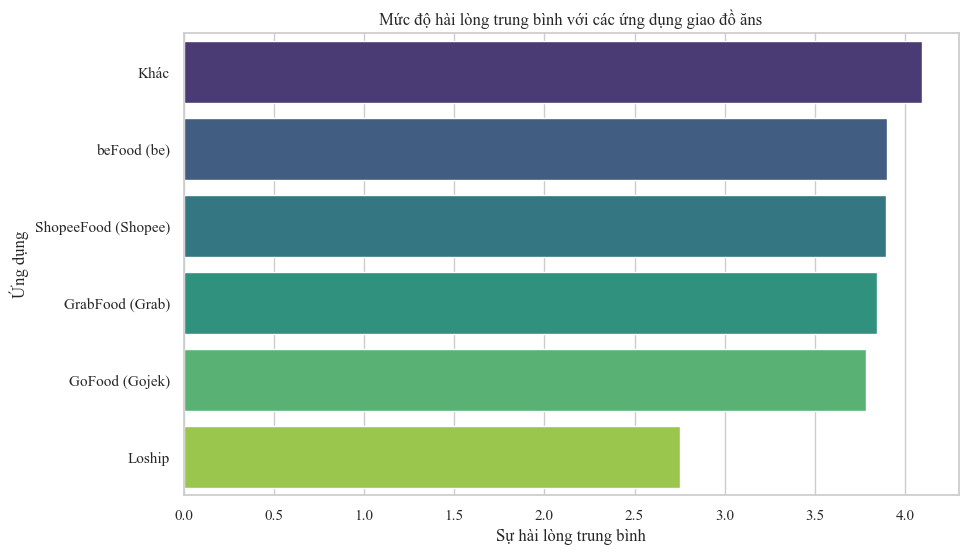

Ứng dụng có độ hài lòng cao nhất là: Khác với điểm hài lòng trung bình: 4.0909


In [124]:
# Tên các cột liên quan đến sự hài lòng
satisfaction_columns = [
    "Sự hài lòng khi sử dụng ứng dụng giao đồ ăn trực tuyến [Tôi thích sử dụng ứng dụng giao đồ ăn trực tuyến.]",
    "Sự hài lòng khi sử dụng ứng dụng giao đồ ăn trực tuyến [Tôi cảm thấy hài lòng khi sử dụng ứng dụng.]",
    "Sự hài lòng khi sử dụng ứng dụng giao đồ ăn trực tuyến [Tôi cảm thấy hạnh phúc khi sử dụng ứng dụng.]",
    "Sự hài lòng khi sử dụng ứng dụng giao đồ ăn trực tuyến [Tôi cảm thấy tự tin khi sử dụng ứng dụng.]"
]

# Tên cột chứa thông tin ứng dụng
application_column = "6. Ứng dụng giao đồ ăn trực tuyến anh/chị thường xuyên sử dụng nhất là?"

# Kiểm tra nếu các cột cần thiết có trong dữ liệu
if all(col in df_khaosat_cleaned.columns for col in satisfaction_columns) and application_column in df_khaosat_cleaned.columns:
    # Tính mức độ hài lòng trung bình tạm thời
    satisfaction_mean = (
        df_khaosat_cleaned.groupby(application_column)[satisfaction_columns].mean().mean(axis=1).sort_values(ascending=False)
    )

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    sns.barplot(x=satisfaction_mean, y=satisfaction_mean.index, palette="viridis")
    plt.title("Mức độ hài lòng trung bình với các ứng dụng giao đồ ăns")
    plt.xlabel("Sự hài lòng trung bình")
    plt.ylabel("Ứng dụng")
    plt.show()

    # Ứng dụng có độ hài lòng cao nhất
    most_satisfied_app = satisfaction_mean.idxmax()
    max_satisfaction_score = satisfaction_mean.max()

    print(f"Ứng dụng có độ hài lòng cao nhất là: {most_satisfied_app} với điểm hài lòng trung bình: {max_satisfaction_score:.4f}")
else:
    print("Dữ liệu không chứa đủ cột cần thiết.")
